In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install emoji
!pip install num2words
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install python-docx
!pip install ipynb
!pip install seaborn
!pip install unidecode
!pip install python-docx
import docx

In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud
from sklearn import metrics
import docx
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(2100, 1)

In [ ]:
preprocessor = Preprocessor(set(stopwords.words('romanian')),None, None, True, True, True, True, False, True, True, True, True, False, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [ ]:
preprocessed_test_data['text'] = preprocessed_test_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_test_data

,text
0,mare durere fizica simtita clasa ten stomatolo...
1,petitie asf impotriva speculei asiguratorilor ...
2,ride sharing plecat proteste redditori masini ...
3,apasa trimite refugiat sprit ten salvati gold ...
4,politia datoria scurt depus plangere politie m...
...,...
1320,sfat buna neboie sfat facut doza vaccin contra...
1321,boli mintale soferii tir dn1 locuit an jumatat...
1322,freelancer gasesc clienti gasesc client job fr...
1323,furata cunostinta spune probe suficiente furat...


In [ ]:
preprocessed_train_data['text'] = preprocessed_train_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_train_data

,text
0,rant ajuns cumparam originalul postare tip imp...
1,true grit secretul succesului evident ideile c...
2,experiente schimbat mentalitatea buna experien...
3,subreddit trebui numeasca r depresie casual ti...
4,ticalosilor entr acte unchiul scrie decat marc...
...,...
2095,mersul sala eticheta mno inceput merg sala tov...
2096,maine sala controla emotiile long story short ...
2097,stie gasesc granita italiana intors sicilia ma...
2098,somn permanenta stiu fac efectiv somn momentul...


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
#hyperparametrization

best_f1 = 0
chosen_parameters = {}
data = []
for max_features in [3000, 5000]:
  for n_gram in [(1, 1), (1, 2), (1, 3)]:
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
      for tol in [5, 0.3, 3]:
        for C in [0.1, 0.3, 3, 10]:
            #initiate the TfidfVectorizer
            tfidf = TfidfVectorizer(max_features = max_features, ngram_range = n_gram)

            #convert the training and validation data to tf-idf indexes
            X_train_tfidf = tfidf.fit_transform(preprocessed_train_data['text']) # Fit and transform on text column
            X_test_tfidf = tfidf.transform(preprocessed_test_data["text"])

            # Apply SMOTE on the tfidf representation
            X_res, y_res = sm.fit_resample(X_train_tfidf, train_labels) # Use tfidf data for SMOTE

            sm = SMOTE(random_state=42)
            model = LogisticRegression(solver = solver, tol = tol, C = C)

            model.fit(X_res, y_res)
            predictions = model.predict(X_test_tfidf)

            f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')
            print(classification_report(test_labels['label'], predictions))
            print('max_features: {} n_gram: {}  solver: {}  tol: {}  C: {}  f1: {}'.format(max_features, n_gram, solver, tol, C, f1))
            data.append({
              "max_features": max_features,
              "solver": solver,
              "tol": tol,
              "C": C,
              "n_gram": n_gram,
              "f1": f1
            })
            if f1 > best_f1:
                best_f1 = f1
                chosen_parameters["max_features"] = max_features
                chosen_parameters["n_gram"] = n_gram
                chosen_parameters["solver"] = solver
                chosen_parameters["tol"] = tol
                chosen_parameters["C"] = C

print(best_f1)
print(chosen_parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.23      0.29      0.26        75

           accuracy                           0.67      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.4627797526422735


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.4428218793249468


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 3  f1: 0.43264826175416843


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 10  f1: 0.437184269597436


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.22      0.28      0.25        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.4610236537067949


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.19      0.17      0.18        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.43829898571241327


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.43321475180639113


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.36      0.32       250
    true_depression       0.24      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.43      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.43656354239566725


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.23      0.29      0.26        75

           accuracy                           0.67      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.4627797526422735


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.4428218793249468


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 3  f1: 0.43465166455031473


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.37      0.34       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 10  f1: 0.4373094613600943


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.75      0.79      1000
possible_depression       0.31      0.39      0.34       250
    true_depression       0.21      0.31      0.25        75

           accuracy                           0.66      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.4609102493429891


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.22      0.28      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.45722774718332077


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.75      0.79      1000
possible_depression       0.30      0.42      0.35       250
    true_depression       0.19      0.21      0.20        75

           accuracy                           0.66      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 3  f1: 0.4482608878291889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.80      1000
possible_depression       0.31      0.44      0.36       250
    true_depression       0.18      0.15      0.16        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 10  f1: 0.44140250781678114


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.21      0.28      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.46009860627551785


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.36      0.32       250
    true_depression       0.19      0.17      0.18        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.43538615774441664


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.32       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 3  f1: 0.4309167625623322


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.80      0.81      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.68      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 10  f1: 0.4280085398966307


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.22      0.28      0.25        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.4591123470247554


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.19      0.17      0.18        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.4384759567225389


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.43321475180639113


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.38      0.33       250
    true_depression       0.24      0.15      0.18        75

           accuracy                           0.68      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.44152650868800375


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.23      0.29      0.26        75

           accuracy                           0.67      1325
          macro avg       0.46      0.48      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.4638737658946885


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.36      0.32       250
    true_depression       0.19      0.17      0.18        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.43538615774441664


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.32       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 3  f1: 0.4309167625623322


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.25      0.15      0.18        75

           accuracy                           0.68      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 10  f1: 0.44015355114957205


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.31      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.44919844745514254


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.30      0.32      0.31       250
    true_depression       0.24      0.31      0.27        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.4608736624136691


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.15      0.17        75

           accuracy                           0.67      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.68      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.42895849887505494


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.79      1000
possible_depression       0.29      0.40      0.33       250
    true_depression       0.21      0.13      0.16        75

           accuracy                           0.66      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.4301982436636383


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.31      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.44919844745514254


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.30      0.32      0.31       250
    true_depression       0.24      0.31      0.27        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.4608736624136691


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.20      0.16      0.18        75

           accuracy                           0.68      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.4364977497311608


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.30      0.38      0.33       250
    true_depression       0.21      0.13      0.16        75

           accuracy                           0.67      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.4341152234813896


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.31      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.44919844745514254


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.30      0.32      0.31       250
    true_depression       0.24      0.31      0.27        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.4608736624136691


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.15      0.17        75

           accuracy                           0.67      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.68      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.42895849887505494


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.79      1000
possible_depression       0.29      0.40      0.33       250
    true_depression       0.21      0.13      0.16        75

           accuracy                           0.66      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.4301982436636383


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.25      0.22        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 5  C: 0.1  f1: 0.44342534859334287


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.30      0.41      0.35       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.66      1325
          macro avg       0.45      0.45      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 5  C: 0.3  f1: 0.4440244936740621


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.80      0.81      1000
possible_depression       0.27      0.30      0.28       250
    true_depression       0.16      0.11      0.13        75

           accuracy                           0.67      1325
          macro avg       0.41      0.40      0.40      1325
       weighted avg       0.67      0.67      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 5  C: 3  f1: 0.40471996591210285


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.74      0.78      1000
possible_depression       0.28      0.44      0.35       250
    true_depression       0.19      0.12      0.15        75

           accuracy                           0.65      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.65      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 5  C: 10  f1: 0.42504544086320273


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.30      0.35      0.33       250
    true_depression       0.22      0.29      0.25        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 0.1  f1: 0.4590552323133797


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.29      0.39      0.33       250
    true_depression       0.21      0.20      0.21        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 0.3  f1: 0.4435122364776906


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.20      0.15      0.17        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 3  f1: 0.4336996336996337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.24      0.16      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 10  f1: 0.4416612061773353


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.72      0.78      1000
possible_depression       0.29      0.44      0.35       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.64      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.64      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 3  C: 0.1  f1: 0.43902289635823033


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.29      0.37      0.33       250
    true_depression       0.21      0.19      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 3  C: 0.3  f1: 0.4409945161825271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.74      0.78      1000
possible_depression       0.28      0.43      0.34       250
    true_depression       0.21      0.11      0.14        75

           accuracy                           0.65      1325
          macro avg       0.44      0.43      0.42      1325
       weighted avg       0.68      0.65      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 3  C: 3  f1: 0.4193738816020071


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.77      0.79      1000
possible_depression       0.26      0.33      0.29       250
    true_depression       0.23      0.20      0.22        75

           accuracy                           0.65      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.68      0.65      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: sag  tol: 3  C: 10  f1: 0.43091115711254996


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.70      0.77      1000
possible_depression       0.30      0.42      0.35       250
    true_depression       0.17      0.33      0.23        75

           accuracy                           0.63      1325
          macro avg       0.44      0.49      0.45      1325
       weighted avg       0.71      0.63      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 5  C: 0.1  f1: 0.44910681811624076


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.68      0.76      1000
possible_depression       0.30      0.54      0.39       250
    true_depression       0.23      0.24      0.24        75

           accuracy                           0.63      1325
          macro avg       0.46      0.49      0.46      1325
       weighted avg       0.71      0.63      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 5  C: 0.3  f1: 0.4603520231044398


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.65      0.74      1000
possible_depression       0.28      0.50      0.36       250
    true_depression       0.18      0.24      0.21        75

           accuracy                           0.60      1325
          macro avg       0.44      0.47      0.43      1325
       weighted avg       0.70      0.60      0.64      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 5  C: 3  f1: 0.434656084324732


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.29      0.37      0.32       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.66      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 5  C: 10  f1: 0.45220942433485983


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.33      0.29      0.31       250
    true_depression       0.18      0.45      0.26        75

           accuracy                           0.65      1325
          macro avg       0.45      0.50      0.45      1325
       weighted avg       0.70      0.65      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 0.1  f1: 0.4523709512929808


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.88      0.57      0.70      1000
possible_depression       0.29      0.68      0.40       250
    true_depression       0.17      0.19      0.18        75

           accuracy                           0.57      1325
          macro avg       0.44      0.48      0.43      1325
       weighted avg       0.73      0.57      0.61      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 0.3  f1: 0.4250488989676622


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.28      0.38      0.33       250
    true_depression       0.23      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.43      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 3  f1: 0.43536061907987617


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.72      0.77      1000
possible_depression       0.30      0.50      0.37       250
    true_depression       0.24      0.13      0.17        75

           accuracy                           0.65      1325
          macro avg       0.46      0.45      0.44      1325
       weighted avg       0.70      0.65      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 10  f1: 0.4389138398071768


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.87      0.83      1000
possible_depression       0.30      0.06      0.11       250
    true_depression       0.18      0.44      0.26        75

           accuracy                           0.69      1325
          macro avg       0.43      0.46      0.40      1325
       weighted avg       0.67      0.69      0.66      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 3  C: 0.1  f1: 0.3984060097608006


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.80      1000
possible_depression       0.29      0.42      0.34       250
    true_depression       0.33      0.08      0.13        75

           accuracy                           0.67      1325
          macro avg       0.48      0.42      0.42      1325
       weighted avg       0.69      0.67      0.67      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 3  C: 0.3  f1: 0.4212048642669733


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.61      0.71      1000
possible_depression       0.26      0.59      0.36       250
    true_depression       0.18      0.12      0.14        75

           accuracy                           0.58      1325
          macro avg       0.43      0.44      0.41      1325
       weighted avg       0.70      0.58      0.61      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 3  C: 3  f1: 0.4057587263943405


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.68      0.76      1000
possible_depression       0.30      0.58      0.39       250
    true_depression       0.21      0.11      0.14        75

           accuracy                           0.63      1325
          macro avg       0.45      0.46      0.43      1325
       weighted avg       0.71      0.63      0.65      1325

max_features: 3000 n_gram: (1, 1)  solver: saga  tol: 3  C: 10  f1: 0.43038251699177676


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.4555116493396834


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.4377230803890717


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.32      0.38      0.34       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 3  f1: 0.43818296286602093


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.37      0.34       250
    true_depression       0.17      0.11      0.13        75

           accuracy                           0.69      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 10  f1: 0.4297918797827778


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.45057712012959045


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.4370159370755349


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.38      0.34       250
    true_depression       0.21      0.13      0.16        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.44073551338612643


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.4393783740230441


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.4555116493396834


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.4372386237608778


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 3  f1: 0.44078248260434916


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 10  f1: 0.43712957701426775


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.75      0.79      1000
possible_depression       0.31      0.40      0.35       250
    true_depression       0.20      0.28      0.24        75

           accuracy                           0.66      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.45976320545214683


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.20      0.25      0.22        75

           accuracy                           0.67      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.4530560357923295


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.75      0.79      1000
possible_depression       0.31      0.42      0.36       250
    true_depression       0.17      0.19      0.18        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.66      0.67      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 3  f1: 0.44249277812855237


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.80      1000
possible_depression       0.31      0.43      0.36       250
    true_depression       0.18      0.15      0.16        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 10  f1: 0.4386227483694207


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.31      0.39      0.35       250
    true_depression       0.20      0.25      0.23        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.45762053041857315


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.30      0.36      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.4380151293263512


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.22      0.15      0.18        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 3  f1: 0.4447305826728467


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.21      0.11      0.14        75

           accuracy                           0.69      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 10  f1: 0.43200559585475623


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.45057712012959045


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.43817937095316833


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.22      0.15      0.17        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.45      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.4460400408345088


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.43897569185114377


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.451129422610925


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.30      0.36      0.32       250
    true_depression       0.19      0.19      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.4380151293263512


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.22      0.15      0.18        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 3  f1: 0.4447305826728467


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.21      0.11      0.14        75

           accuracy                           0.69      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 10  f1: 0.43200559585475623


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.21      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.44945802522854356


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.4527563171317271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.39      0.35       250
    true_depression       0.22      0.16      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.4481705778910814


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.80      1000
possible_depression       0.30      0.40      0.34       250
    true_depression       0.22      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.4386642671127014


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.21      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.44945802522854356


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.4527563171317271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.446055086416673


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.39      0.35       250
    true_depression       0.23      0.15      0.18        75

           accuracy                           0.68      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.4459106833457093


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.21      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.44945802522854356


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.4527563171317271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.39      0.35       250
    true_depression       0.22      0.16      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.4481705778910814


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.80      1000
possible_depression       0.30      0.40      0.34       250
    true_depression       0.22      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.4386642671127014


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.79      0.80      1000
possible_depression       0.29      0.30      0.29       250
    true_depression       0.22      0.25      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.68      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 5  C: 0.1  f1: 0.44402207674518895


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.21      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 5  C: 0.3  f1: 0.4413107369664746


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.76      0.79      1000
possible_depression       0.29      0.39      0.33       250
    true_depression       0.23      0.20      0.22        75

           accuracy                           0.66      1325
          macro avg       0.45      0.45      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 5  C: 3  f1: 0.4449895413618344


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.28      0.36      0.32       250
    true_depression       0.24      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.68      0.67      0.67      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 5  C: 10  f1: 0.4326030122193805


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.34       250
    true_depression       0.22      0.28      0.25        75

           accuracy                           0.67      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 0.1  f1: 0.46274559284110267


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.40      0.35       250
    true_depression       0.18      0.15      0.16        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 0.3  f1: 0.43819690769008096


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.82      0.83      1000
possible_depression       0.33      0.38      0.35       250
    true_depression       0.17      0.11      0.13        75

           accuracy                           0.70      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 3  f1: 0.4371369163544942


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.31      0.39      0.35       250
    true_depression       0.17      0.11      0.13        75

           accuracy                           0.68      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 10  f1: 0.42810780174051644


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.77      0.79      1000
possible_depression       0.27      0.28      0.27       250
    true_depression       0.21      0.32      0.25        75

           accuracy                           0.65      1325
          macro avg       0.43      0.46      0.44      1325
       weighted avg       0.68      0.65      0.66      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 3  C: 0.1  f1: 0.4386313516144242


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.24      0.27      0.25        75

           accuracy                           0.68      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 3  C: 0.3  f1: 0.460012437997751


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.80      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.25      0.17      0.20        75

           accuracy                           0.68      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 3  C: 3  f1: 0.448691384310235


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.34      0.33       250
    true_depression       0.23      0.17      0.20        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: sag  tol: 3  C: 10  f1: 0.4450166931901862


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.91      0.47      0.62      1000
possible_depression       0.26      0.76      0.38       250
    true_depression       0.18      0.20      0.19        75

           accuracy                           0.50      1325
          macro avg       0.45      0.47      0.40      1325
       weighted avg       0.75      0.50      0.55      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 5  C: 0.1  f1: 0.39689872478696514


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.95      0.34      0.50      1000
possible_depression       0.25      0.86      0.38       250
    true_depression       0.15      0.20      0.17        75

           accuracy                           0.43      1325
          macro avg       0.45      0.46      0.35      1325
       weighted avg       0.77      0.43      0.46      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 5  C: 0.3  f1: 0.35080424936297155


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.79      0.92      0.85      1000
possible_depression       0.32      0.14      0.20       250
    true_depression       0.22      0.16      0.19        75

           accuracy                           0.73      1325
          macro avg       0.45      0.41      0.41      1325
       weighted avg       0.67      0.73      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 5  C: 3  f1: 0.4120871982778347


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.31      0.31       250
    true_depression       0.21      0.24      0.22        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 5  C: 10  f1: 0.4470767595389953


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.88      0.84      1000
possible_depression       0.31      0.10      0.15       250
    true_depression       0.20      0.36      0.25        75

           accuracy                           0.71      1325
          macro avg       0.43      0.45      0.41      1325
       weighted avg       0.67      0.71      0.67      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 0.1  f1: 0.41300791201687015


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.21      0.20      0.20        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 0.3  f1: 0.4430561839609393


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.71      0.77      1000
possible_depression       0.29      0.48      0.36       250
    true_depression       0.19      0.17      0.18        75

           accuracy                           0.64      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.64      0.66      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 3  f1: 0.4376220932046027


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.87      0.84      1000
possible_depression       0.31      0.25      0.28       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.71      1325
          macro avg       0.45      0.41      0.42      1325
       weighted avg       0.68      0.71      0.69      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 10  f1: 0.42387662863986514


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.70      0.76      1000
possible_depression       0.28      0.45      0.34       250
    true_depression       0.20      0.23      0.21        75

           accuracy                           0.62      1325
          macro avg       0.44      0.46      0.44      1325
       weighted avg       0.70      0.62      0.65      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 3  C: 0.1  f1: 0.4385266600430535


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.88      0.50      0.64      1000
possible_depression       0.26      0.51      0.35       250
    true_depression       0.14      0.48      0.21        75

           accuracy                           0.50      1325
          macro avg       0.42      0.50      0.40      1325
       weighted avg       0.72      0.50      0.56      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 3  C: 0.3  f1: 0.39906424711206284


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.74      0.78      1000
possible_depression       0.28      0.40      0.33       250
    true_depression       0.16      0.13      0.15        75

           accuracy                           0.65      1325
          macro avg       0.42      0.43      0.42      1325
       weighted avg       0.68      0.65      0.66      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 3  C: 3  f1: 0.4189428350337381


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.65      0.73      1000
possible_depression       0.26      0.51      0.34       250
    true_depression       0.18      0.15      0.16        75

           accuracy                           0.59      1325
          macro avg       0.43      0.43      0.41      1325
       weighted avg       0.69      0.59      0.63      1325

max_features: 3000 n_gram: (1, 2)  solver: saga  tol: 3  C: 10  f1: 0.4125088439815549


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.45612182814187685


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.439433100023849


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.22      0.16      0.19        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 3  f1: 0.44594902428866084


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.39      0.35       250
    true_depression       0.21      0.12      0.15        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 10  f1: 0.43867556025648485


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.4580311069480382


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.4418596375155379


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.39      0.35       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.44248849810607455


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.24      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.43      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.4364783333758458


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.45612182814187685


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.439433100023849


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.22      0.16      0.19        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 3  f1: 0.44594902428866084


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 10  f1: 0.43677262680364387


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.75      0.79      1000
possible_depression       0.31      0.40      0.35       250
    true_depression       0.21      0.28      0.24        75

           accuracy                           0.66      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.4596130164269418


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.45685983580955186


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.30      0.40      0.35       250
    true_depression       0.18      0.20      0.19        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 3  f1: 0.44189272021797743


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.31      0.42      0.35       250
    true_depression       0.18      0.16      0.17        75

           accuracy                           0.66      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.66      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 10  f1: 0.4389729219092691


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.66      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.4510201108353277


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.4379706575520408


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.19      0.12      0.15        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 3  f1: 0.43348630477570976


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.19      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 10  f1: 0.4271893975655115


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.4572125821350001


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.4421698265235798


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.4401234995277492


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.38      0.34       250
    true_depression       0.24      0.13      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.4379228690294588


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.25      0.23        75

           accuracy                           0.67      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.45483833135260504


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.67      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.4379706575520408


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.38      0.35       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 3  f1: 0.4397146384963644


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.38      0.34       250
    true_depression       0.19      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 10  f1: 0.4271893975655115


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.44985120712520876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.32      0.31       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.4427968353345939


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.22      0.17      0.19        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.4428926418190213


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.79      1000
possible_depression       0.28      0.38      0.32       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.66      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.68      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.4255473904325982


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.44985120712520876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.32      0.31       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.4427968353345939


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.20      0.16      0.18        75

           accuracy                           0.68      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.4417747734559769


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.23      0.15      0.18        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.4386431709798069


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.30      0.30       250
    true_depression       0.20      0.29      0.24        75

           accuracy                           0.67      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.44985120712520876


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.32      0.31       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.4427968353345939


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.22      0.17      0.19        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.4428926418190213


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.79      1000
possible_depression       0.28      0.38      0.32       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.66      1325
          macro avg       0.43      0.43      0.43      1325
       weighted avg       0.68      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.4255473904325982


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.77      0.79      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.20      0.27      0.23        75

           accuracy                           0.66      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 5  C: 0.1  f1: 0.4478527185000154


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.28      0.36      0.32       250
    true_depression       0.22      0.15      0.17        75

           accuracy                           0.67      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.68      0.67      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 5  C: 0.3  f1: 0.429974873557414


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.76      0.80      1000
possible_depression       0.31      0.47      0.38       250
    true_depression       0.20      0.12      0.15        75

           accuracy                           0.67      1325
          macro avg       0.45      0.45      0.44      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 5  C: 3  f1: 0.44101080780423646


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.75      0.79      1000
possible_depression       0.30      0.47      0.36       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.66      1325
          macro avg       0.45      0.44      0.43      1325
       weighted avg       0.70      0.66      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 5  C: 10  f1: 0.4335050427359024


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.30      0.38      0.33       250
    true_depression       0.21      0.28      0.24        75

           accuracy                           0.66      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 0.1  f1: 0.4566611448222965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 0.3  f1: 0.44854432261839666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.19      0.13      0.16        75

           accuracy                           0.69      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 3  f1: 0.43927132278593944


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.29      0.36      0.32       250
    true_depression       0.30      0.17      0.22        75

           accuracy                           0.68      1325
          macro avg       0.47      0.44      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 10  f1: 0.45013903176135767


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 3  C: 0.1  f1: 0.4493711854130867


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.83      0.81      1000
possible_depression       0.27      0.24      0.26       250
    true_depression       0.23      0.23      0.23        75

           accuracy                           0.68      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.67      0.68      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 3  C: 0.3  f1: 0.4339506774834064


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.75      0.78      1000
possible_depression       0.28      0.41      0.33       250
    true_depression       0.13      0.09      0.11        75

           accuracy                           0.65      1325
          macro avg       0.41      0.42      0.41      1325
       weighted avg       0.68      0.65      0.66      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 3  C: 3  f1: 0.409499636721234


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.37      0.33       250
    true_depression       0.19      0.12      0.15        75

           accuracy                           0.67      1325
          macro avg       0.43      0.42      0.42      1325
       weighted avg       0.68      0.67      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: sag  tol: 3  C: 10  f1: 0.42472981677796345


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.64      0.73      1000
possible_depression       0.28      0.63      0.39       250
    true_depression       0.40      0.03      0.05        75

           accuracy                           0.60      1325
          macro avg       0.51      0.43      0.39      1325
       weighted avg       0.72      0.60      0.63      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 5  C: 0.1  f1: 0.38858670775139276


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.86      0.62      0.72      1000
possible_depression       0.29      0.60      0.39       250
    true_depression       0.18      0.19      0.18        75

           accuracy                           0.59      1325
          macro avg       0.44      0.47      0.43      1325
       weighted avg       0.71      0.59      0.63      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 5  C: 0.3  f1: 0.43068707912457915


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.73      0.77      1000
possible_depression       0.29      0.45      0.35       250
    true_depression       0.20      0.13      0.16        75

           accuracy                           0.64      1325
          macro avg       0.44      0.44      0.43      1325
       weighted avg       0.69      0.64      0.66      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 5  C: 3  f1: 0.42866732425993875


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.71      0.77      1000
possible_depression       0.28      0.45      0.34       250
    true_depression       0.21      0.15      0.17        75

           accuracy                           0.63      1325
          macro avg       0.44      0.44      0.43      1325
       weighted avg       0.69      0.63      0.65      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 5  C: 10  f1: 0.4278164747403266


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.74      0.78      1000
possible_depression       0.32      0.33      0.32       250
    true_depression       0.17      0.39      0.24        75

           accuracy                           0.64      1325
          macro avg       0.44      0.49      0.45      1325
       weighted avg       0.70      0.64      0.67      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 0.1  f1: 0.44749072892129577


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.30      0.36      0.32       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.45      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 0.3  f1: 0.44849704611405367


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.82      0.82      1000
possible_depression       0.31      0.36      0.34       250
    true_depression       0.32      0.11      0.16        75

           accuracy                           0.69      1325
          macro avg       0.48      0.43      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 3  f1: 0.43784081386630597


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.84      0.83      1000
possible_depression       0.31      0.30      0.30       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.68      0.70      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 10  f1: 0.42907034324195337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.73      0.78      1000
possible_depression       0.29      0.36      0.32       250
    true_depression       0.19      0.32      0.24        75

           accuracy                           0.64      1325
          macro avg       0.44      0.47      0.45      1325
       weighted avg       0.69      0.64      0.66      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 3  C: 0.1  f1: 0.4458499311163337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.93      0.37      0.53      1000
possible_depression       0.25      0.86      0.38       250
    true_depression       0.21      0.16      0.18        75

           accuracy                           0.45      1325
          macro avg       0.46      0.46      0.37      1325
       weighted avg       0.76      0.45      0.48      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 3  C: 0.3  f1: 0.36580924363355


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.84      0.83      1000
possible_depression       0.31      0.28      0.29       250
    true_depression       0.22      0.20      0.21        75

           accuracy                           0.70      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 3  C: 3  f1: 0.4434627131309203


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.84      0.82      1000
possible_depression       0.28      0.30      0.29       250
    true_depression       0.30      0.04      0.07        75

           accuracy                           0.69      1325
          macro avg       0.46      0.40      0.40      1325
       weighted avg       0.68      0.69      0.68      1325

max_features: 3000 n_gram: (1, 3)  solver: saga  tol: 3  C: 10  f1: 0.3951299383774574


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.31      0.36      0.34       250
    true_depression       0.21      0.21      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.45162214830200104


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.23      0.19      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.44703701478321434


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.70      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 3  f1: 0.4341931216931217


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.22      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.45      0.42      0.42      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 5  C: 10  f1: 0.42494592727820324


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.21      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.451479804260489


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.23      0.20      0.22        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.4505557301376868


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.38      0.35       250
    true_depression       0.23      0.11      0.15        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.4414278718555214


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.31      0.36      0.34       250
    true_depression       0.24      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.4314667644264057


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.31      0.36      0.34       250
    true_depression       0.23      0.24      0.24        75

           accuracy                           0.68      1325
          macro avg       0.46      0.46      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.4594162003001105


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.24      0.20      0.22        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.4504733087684884


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.26      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.47      0.44      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 3  f1: 0.4450660788152924


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: lbfgs  tol: 3  C: 10  f1: 0.43365964533261314


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.29      0.35      0.32       250
    true_depression       0.22      0.29      0.25        75

           accuracy                           0.66      1325
          macro avg       0.44      0.47      0.45      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.452952151309619


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.33      0.35      0.34       250
    true_depression       0.25      0.29      0.27        75

           accuracy                           0.69      1325
          macro avg       0.47      0.48      0.48      1325
       weighted avg       0.70      0.69      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.47595605437545124


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.80      1000
possible_depression       0.32      0.42      0.36       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 3  f1: 0.4540113915082702


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.31      0.43      0.36       250
    true_depression       0.21      0.16      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 0.3  C: 10  f1: 0.4488823724566877


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.23      0.24      0.24        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.454306966532189


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.23      0.20      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.450187641836081


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.21      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 3  f1: 0.43486449987145087


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.37      0.34       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 5  C: 10  f1: 0.4334842919669632


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.21      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.45005356958872517


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.34      0.32       250
    true_depression       0.23      0.20      0.22        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.4505557301376868


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.4396267706392795


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.37      0.34       250
    true_depression       0.24      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.43296184570694374


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.21      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.45005356958872517


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.23      0.20      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.450187641836081


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.21      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 3  f1: 0.43486449987145087


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.37      0.34       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cg  tol: 3  C: 10  f1: 0.4334842919669632


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.29      0.30       250
    true_depression       0.23      0.31      0.26        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.45841562822519694


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.25      0.28      0.27        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.47      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.46694201649544337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.82      0.82      1000
possible_depression       0.32      0.37      0.35       250
    true_depression       0.27      0.16      0.20        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.4566857776334338


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.82      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.21      0.08      0.12        75

           accuracy                           0.70      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.42808138970767823


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.29      0.30       250
    true_depression       0.23      0.31      0.26        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.45841562822519694


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.25      0.28      0.27        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.47      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.46694201649544337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.27      0.16      0.20        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.4545408805031446


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.37      0.34       250
    true_depression       0.24      0.11      0.15        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.4365722270228531


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.29      0.30       250
    true_depression       0.23      0.31      0.26        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.45841562822519694


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.25      0.28      0.27        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.47      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.46694201649544337


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.82      0.82      1000
possible_depression       0.32      0.37      0.35       250
    true_depression       0.27      0.16      0.20        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.4566857776334338


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.82      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.21      0.08      0.12        75

           accuracy                           0.70      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.42808138970767823


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.29      0.37      0.32       250
    true_depression       0.24      0.28      0.26        75

           accuracy                           0.66      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.66      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 5  C: 0.1  f1: 0.4592800698834186


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.85      0.83      1000
possible_depression       0.32      0.27      0.29       250
    true_depression       0.24      0.19      0.21        75

           accuracy                           0.70      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.68      0.70      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 5  C: 0.3  f1: 0.443181350757806


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.33      0.39      0.35       250
    true_depression       0.23      0.16      0.19        75

           accuracy                           0.69      1325
          macro avg       0.46      0.45      0.45      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 5  C: 3  f1: 0.4517142917423598


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.70      0.76      1000
possible_depression       0.28      0.50      0.36       250
    true_depression       0.22      0.08      0.12        75

           accuracy                           0.63      1325
          macro avg       0.44      0.43      0.41      1325
       weighted avg       0.69      0.63      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 5  C: 10  f1: 0.41336196018899934


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.32      0.40      0.36       250
    true_depression       0.23      0.24      0.23        75

           accuracy                           0.67      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.67      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 0.1  f1: 0.462976108807007


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.29      0.37      0.33       250
    true_depression       0.20      0.17      0.19        75

           accuracy                           0.66      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 0.3  f1: 0.4365502402654106


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.35      0.34       250
    true_depression       0.27      0.15      0.19        75

           accuracy                           0.70      1325
          macro avg       0.47      0.44      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 3  f1: 0.4511133822745643


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.38      0.35       250
    true_depression       0.13      0.04      0.06        75

           accuracy                           0.69      1325
          macro avg       0.42      0.41      0.41      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 0.3  C: 10  f1: 0.4089436003629991


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.75      0.79      1000
possible_depression       0.29      0.40      0.34       250
    true_depression       0.23      0.24      0.24        75

           accuracy                           0.66      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.70      0.66      0.67      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 3  C: 0.1  f1: 0.4546664150181862


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.78      0.80      1000
possible_depression       0.30      0.39      0.34       250
    true_depression       0.19      0.13      0.16        75

           accuracy                           0.67      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 3  C: 0.3  f1: 0.4305573731373518


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.40      0.35       250
    true_depression       0.25      0.07      0.11        75

           accuracy                           0.69      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 3  C: 3  f1: 0.4257072693441104


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.34      0.31       250
    true_depression       0.25      0.19      0.21        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.68      0.67      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: sag  tol: 3  C: 10  f1: 0.442957215097521


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.77      0.97      0.86      1000
possible_depression       1.00      0.01      0.02       250
    true_depression       0.20      0.16      0.18        75

           accuracy                           0.75      1325
          macro avg       0.66      0.38      0.35      1325
       weighted avg       0.78      0.75      0.66      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 5  C: 0.1  f1: 0.3518005072511692


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.89      0.84      1000
possible_depression       0.31      0.23      0.26       250
    true_depression       0.21      0.07      0.10        75

           accuracy                           0.72      1325
          macro avg       0.44      0.39      0.40      1325
       weighted avg       0.67      0.72      0.69      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 5  C: 0.3  f1: 0.40079951240892503


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.85      0.83      1000
possible_depression       0.32      0.25      0.28       250
    true_depression       0.23      0.24      0.24        75

           accuracy                           0.71      1325
          macro avg       0.46      0.45      0.45      1325
       weighted avg       0.69      0.71      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 5  C: 3  f1: 0.4504952683378281


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.78      0.94      0.85      1000
possible_depression       0.27      0.11      0.16       250
    true_depression       0.32      0.11      0.16        75

           accuracy                           0.73      1325
          macro avg       0.46      0.38      0.39      1325
       weighted avg       0.66      0.73      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 5  C: 10  f1: 0.39025808586318145


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.74      0.78      1000
possible_depression       0.29      0.43      0.35       250
    true_depression       0.18      0.16      0.17        75

           accuracy                           0.65      1325
          macro avg       0.44      0.44      0.43      1325
       weighted avg       0.69      0.65      0.67      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 0.1  f1: 0.4340206894282306


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.86      0.61      0.71      1000
possible_depression       0.27      0.62      0.38       250
    true_depression       0.20      0.12      0.15        75

           accuracy                           0.58      1325
          macro avg       0.44      0.45      0.41      1325
       weighted avg       0.71      0.58      0.62      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 0.3  f1: 0.41369082707422605


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.68      0.76      1000
possible_depression       0.29      0.54      0.38       250
    true_depression       0.20      0.12      0.15        75

           accuracy                           0.62      1325
          macro avg       0.44      0.45      0.43      1325
       weighted avg       0.70      0.62      0.65      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 3  f1: 0.4273864406719119


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.88      0.84      1000
possible_depression       0.32      0.24      0.27       250
    true_depression       0.22      0.12      0.16        75

           accuracy                           0.72      1325
          macro avg       0.45      0.41      0.42      1325
       weighted avg       0.68      0.72      0.70      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 0.3  C: 10  f1: 0.42319035082901085


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.78      0.93      0.85      1000
possible_depression       0.32      0.10      0.15       250
    true_depression       0.25      0.19      0.21        75

           accuracy                           0.73      1325
          macro avg       0.45      0.41      0.41      1325
       weighted avg       0.67      0.73      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 3  C: 0.1  f1: 0.40597434301826646


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.86      0.61      0.72      1000
possible_depression       0.28      0.66      0.39       250
    true_depression       0.23      0.08      0.12        75

           accuracy                           0.59      1325
          macro avg       0.46      0.45      0.41      1325
       weighted avg       0.72      0.59      0.62      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 3  C: 0.3  f1: 0.40930964596189706


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.87      0.61      0.71      1000
possible_depression       0.28      0.66      0.40       250
    true_depression       0.15      0.08      0.10        75

           accuracy                           0.59      1325
          macro avg       0.43      0.45      0.40      1325
       weighted avg       0.72      0.59      0.62      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 3  C: 3  f1: 0.4048932150629208


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.77      0.96      0.86      1000
possible_depression       0.37      0.10      0.16       250
    true_depression       0.31      0.07      0.11        75

           accuracy                           0.75      1325
          macro avg       0.49      0.38      0.38      1325
       weighted avg       0.67      0.75      0.68      1325

max_features: 5000 n_gram: (1, 1)  solver: saga  tol: 3  C: 10  f1: 0.3766385969992491


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.68      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.4627940990948371


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.20      0.17      0.19        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.4466786278132135


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.18      0.12      0.15        75

           accuracy                           0.69      1325
          macro avg       0.44      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 3  f1: 0.42868848417012323


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.83      0.82      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.23      0.11      0.15        75

           accuracy                           0.70      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 5  C: 10  f1: 0.43042354791596454


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.34      0.40      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.47      1325
       weighted avg       0.71      0.69      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.46584010428383743


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.20      0.17      0.18        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.4460176040797849


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.31      0.34      0.33       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.44262939411020824


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.82      0.82      1000
possible_depression       0.31      0.34      0.33       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.69      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.4364549595646839


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.33      0.38      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.46291065727971326


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.20      0.17      0.18        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.44519648956299207


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.24      0.13      0.17        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 3  f1: 0.438843274008288


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.83      0.82      1000
possible_depression       0.31      0.33      0.32       250
    true_depression       0.23      0.11      0.15        75

           accuracy                           0.70      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: lbfgs  tol: 3  C: 10  f1: 0.43042354791596454


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.32      0.39      0.35       250
    true_depression       0.21      0.27      0.24        75

           accuracy                           0.67      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.4613263904270692


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.33      0.35      0.34       250
    true_depression       0.22      0.25      0.23        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.46267140238166404


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.81      1000
possible_depression       0.34      0.44      0.38       250
    true_depression       0.20      0.20      0.20        75

           accuracy                           0.68      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.71      0.68      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 3  f1: 0.46459442991493755


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.81      1000
possible_depression       0.32      0.43      0.37       250
    true_depression       0.20      0.15      0.17        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 0.3  C: 10  f1: 0.4485655601934672


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 2)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.4639409379250967


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.19      0.16      0.17        75

           accuracy                           0.69      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.44287942002521946


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.34      0.33       250
    true_depression       0.25      0.13      0.17        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 3  f1: 0.44349624195346493


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.27      0.12      0.17        75

           accuracy                           0.70      1325
          macro avg       0.47      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 5  C: 10  f1: 0.4412541254125413


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.4639409379250967


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.20      0.17      0.18        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.44519648956299207


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.31      0.34      0.33       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.4417524697603707


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.82      0.82      1000
possible_depression       0.31      0.34      0.33       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.69      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.43685577386133856


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.4639409379250967


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.19      0.16      0.17        75

           accuracy                           0.69      1325
          macro avg       0.44      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.44287942002521946


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 3  f1: 0.4441831223275942


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.83      0.82      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cg  tol: 3  C: 10  f1: 0.4364612154749768


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.29      0.30       250
    true_depression       0.19      0.25      0.22        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.44213211352764265


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.32      0.32       250
    true_depression       0.22      0.24      0.23        75

           accuracy                           0.69      1325
          macro avg       0.45      0.46      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.4563987299323366


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.25      0.15      0.18        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.4474724511425423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.37      0.33       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.42735575508687296


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.29      0.30       250
    true_depression       0.19      0.25      0.22        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.44213211352764265


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.32      0.32       250
    true_depression       0.22      0.24      0.23        75

           accuracy                           0.69      1325
          macro avg       0.45      0.46      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.4563987299323366


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.34      0.33       250
    true_depression       0.21      0.13      0.16        75

           accuracy                           0.70      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.4408516165956879


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.19      0.09      0.12        75

           accuracy                           0.69      1325
          macro avg       0.44      0.42      0.42      1325
       weighted avg       0.68      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.42275113382946206


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.29      0.30       250
    true_depression       0.19      0.25      0.22        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.44213211352764265


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.32      0.32       250
    true_depression       0.22      0.24      0.23        75

           accuracy                           0.69      1325
          macro avg       0.45      0.46      0.46      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.4563987299323366


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.25      0.15      0.18        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.4474724511425423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.37      0.33       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.42735575508687296


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.30      0.32      0.31       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.68      1325
          macro avg       0.44      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 5  C: 0.1  f1: 0.4452106239647597


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.80      1000
possible_depression       0.31      0.44      0.36       250
    true_depression       0.22      0.15      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.45      0.44      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 5  C: 0.3  f1: 0.4441593973376707


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.81      0.81      1000
possible_depression       0.28      0.33      0.30       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.68      1325
          macro avg       0.44      0.41      0.42      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 5  C: 3  f1: 0.4187902187902188


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.31      0.46      0.37       250
    true_depression       0.19      0.09      0.13        75

           accuracy                           0.66      1325
          macro avg       0.44      0.44      0.43      1325
       weighted avg       0.70      0.66      0.67      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 5  C: 10  f1: 0.4293276930911813


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.80      1000
possible_depression       0.30      0.41      0.35       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.66      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.70      0.66      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 0.1  f1: 0.44601547025947447


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.30      0.40      0.34       250
    true_depression       0.21      0.16      0.18        75

           accuracy                           0.67      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 0.3  f1: 0.4413645798344659


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.69      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 3  f1: 0.44180752794062544


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.30      0.35      0.32       250
    true_depression       0.20      0.09      0.13        75

           accuracy                           0.68      1325
          macro avg       0.44      0.42      0.42      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 0.3  C: 10  f1: 0.42101912352664606


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.30      0.36      0.33       250
    true_depression       0.17      0.16      0.17        75

           accuracy                           0.67      1325
          macro avg       0.43      0.44      0.43      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 3  C: 0.1  f1: 0.43334559405255707


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.74      0.78      1000
possible_depression       0.30      0.43      0.35       250
    true_depression       0.18      0.17      0.18        75

           accuracy                           0.65      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.65      0.67      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 3  C: 0.3  f1: 0.4371046379654158


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.76      0.79      1000
possible_depression       0.28      0.39      0.32       250
    true_depression       0.20      0.12      0.15        75

           accuracy                           0.66      1325
          macro avg       0.43      0.42      0.42      1325
       weighted avg       0.68      0.66      0.67      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 3  C: 3  f1: 0.42176832829006733


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.31      0.37      0.34       250
    true_depression       0.29      0.23      0.26        75

           accuracy                           0.69      1325
          macro avg       0.48      0.47      0.47      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: sag  tol: 3  C: 10  f1: 0.4692877471099412


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.86      0.65      0.74      1000
possible_depression       0.30      0.46      0.36       250
    true_depression       0.18      0.44      0.25        75

           accuracy                           0.60      1325
          macro avg       0.44      0.51      0.45      1325
       weighted avg       0.71      0.60      0.64      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 5  C: 0.1  f1: 0.45059278644184303


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.32      0.14      0.19       250
    true_depression       0.16      0.52      0.24        75

           accuracy                           0.66      1325
          macro avg       0.43      0.48      0.41      1325
       weighted avg       0.69      0.66      0.66      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 5  C: 0.3  f1: 0.413817266744096


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.66      0.74      1000
possible_depression       0.29      0.57      0.38       250
    true_depression       0.23      0.17      0.20        75

           accuracy                           0.61      1325
          macro avg       0.45      0.47      0.44      1325
       weighted avg       0.71      0.61      0.64      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 5  C: 3  f1: 0.43932716876666594


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.88      0.84      1000
possible_depression       0.33      0.23      0.27       250
    true_depression       0.23      0.16      0.19        75

           accuracy                           0.72      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.68      0.72      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 5  C: 10  f1: 0.43411924046398837


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.71      0.77      1000
possible_depression       0.30      0.49      0.37       250
    true_depression       0.17      0.16      0.17        75

           accuracy                           0.64      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.70      0.64      0.66      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 0.1  f1: 0.4355627366496932


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.32      0.39      0.35       250
    true_depression       0.23      0.09      0.13        75

           accuracy                           0.69      1325
          macro avg       0.46      0.43      0.43      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 0.3  f1: 0.433086672280997


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.86      0.84      1000
possible_depression       0.33      0.32      0.33       250
    true_depression       0.22      0.09      0.13        75

           accuracy                           0.71      1325
          macro avg       0.46      0.42      0.43      1325
       weighted avg       0.69      0.71      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 3  f1: 0.43148541110421995


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.74      0.79      1000
possible_depression       0.30      0.46      0.36       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.65      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.70      0.65      0.67      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 0.3  C: 10  f1: 0.44619832963761313


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.63      0.72      1000
possible_depression       0.22      0.03      0.06       250
    true_depression       0.10      0.72      0.18        75

           accuracy                           0.52      1325
          macro avg       0.39      0.46      0.32      1325
       weighted avg       0.68      0.52      0.57      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 3  C: 0.1  f1: 0.31829799908837664


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.78      0.94      0.85      1000
possible_depression       0.32      0.10      0.15       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.74      1325
          macro avg       0.44      0.38      0.38      1325
       weighted avg       0.66      0.74      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 3  C: 0.3  f1: 0.3831969524543241


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.82      0.82      1000
possible_depression       0.29      0.32      0.31       250
    true_depression       0.22      0.07      0.10        75

           accuracy                           0.69      1325
          macro avg       0.44      0.40      0.41      1325
       weighted avg       0.68      0.69      0.68      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 3  C: 3  f1: 0.4075786042913143


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.81      0.86      0.83      1000
possible_depression       0.34      0.32      0.33       250
    true_depression       0.21      0.05      0.09        75

           accuracy                           0.72      1325
          macro avg       0.45      0.41      0.42      1325
       weighted avg       0.68      0.72      0.70      1325

max_features: 5000 n_gram: (1, 2)  solver: saga  tol: 3  C: 10  f1: 0.4156813821053838


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.81      1000
possible_depression       0.33      0.40      0.36       250
    true_depression       0.21      0.24      0.22        75

           accuracy                           0.68      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.71      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 0.1  f1: 0.46390505004612725


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 0.3  f1: 0.44856444003736745


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.37      0.35       250
    true_depression       0.23      0.13      0.17        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.70      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 3  f1: 0.4448883965496286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.24      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 5  C: 10  f1: 0.4379340240815652


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.20      0.23      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 0.1  f1: 0.45987966728558866


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 0.3  f1: 0.4450057800081515


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.26      0.15      0.19        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 3  f1: 0.4530922746187132


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.70      1325
          macro avg       0.47      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 0.3  C: 10  f1: 0.44167206263813874


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.81      1000
possible_depression       0.32      0.39      0.35       250
    true_depression       0.20      0.23      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 0.1  f1: 0.45790025938219364


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.69      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 0.3  f1: 0.44856444003736745


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.83      0.83      1000
possible_depression       0.34      0.38      0.36       250
    true_depression       0.25      0.15      0.18        75

           accuracy                           0.71      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.71      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 3  f1: 0.4582414358065934


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.24      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: lbfgs  tol: 3  C: 10  f1: 0.4379340240815652


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 5  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.76      0.80      1000
possible_depression       0.32      0.42      0.36       250
    true_depression       0.20      0.25      0.22        75

           accuracy                           0.67      1325
          macro avg       0.45      0.48      0.46      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 0.1  f1: 0.4614437441643324


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.35      0.38      0.36       250
    true_depression       0.20      0.24      0.22        75

           accuracy                           0.69      1325
          macro avg       0.46      0.47      0.47      1325
       weighted avg       0.70      0.69      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 0.3  f1: 0.46522253336310665


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.81      1000
possible_depression       0.34      0.44      0.39       250
    true_depression       0.17      0.19      0.18        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.71      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 3  f1: 0.45792472604645856


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.78      0.81      1000
possible_depression       0.33      0.43      0.37       250
    true_depression       0.19      0.16      0.18        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 0.3  C: 10  f1: 0.4519640033931927


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 0.1  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 0.3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 3  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisio

                     precision    recall  f1-score   support

      no_depression       0.75      1.00      0.86      1000
possible_depression       0.00      0.00      0.00       250
    true_depression       0.00      0.00      0.00        75

           accuracy                           0.75      1325
          macro avg       0.25      0.33      0.29      1325
       weighted avg       0.57      0.75      0.65      1325

max_features: 5000 n_gram: (1, 3)  solver: liblinear  tol: 3  C: 10  f1: 0.2867383512544803


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.19      0.21      0.20        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 0.1  f1: 0.45569585232923976


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.20      0.17      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 0.3  f1: 0.4437934441268834


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.26      0.15      0.19        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 3  f1: 0.45532943290547173


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.25      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 5  C: 10  f1: 0.4402550747031104


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.20      0.23      0.21        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 0.1  f1: 0.45945805403295203


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 0.3  f1: 0.44475351050883


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.33      0.37      0.35       250
    true_depression       0.26      0.15      0.19        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 3  f1: 0.4526770394641395


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.70      1325
          macro avg       0.47      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 0.3  C: 10  f1: 0.44212314687436693


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.79      0.81      1000
possible_depression       0.33      0.39      0.36       250
    true_depression       0.19      0.21      0.20        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.46      1325
       weighted avg       0.70      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 0.1  f1: 0.45569585232923976


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.36      0.33       250
    true_depression       0.20      0.17      0.19        75

           accuracy                           0.68      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 0.3  f1: 0.4437934441268834


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.83      0.83      1000
possible_depression       0.34      0.38      0.36       250
    true_depression       0.25      0.13      0.17        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 3  f1: 0.45293051605038603


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.26      0.12      0.17        75

           accuracy                           0.70      1325
          macro avg       0.47      0.43      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cg  tol: 3  C: 10  f1: 0.4404913303413649


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.31      0.32       250
    true_depression       0.22      0.29      0.25        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 0.1  f1: 0.4597169561135043


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.22      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 0.3  f1: 0.4549632618552313


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.33      0.38      0.35       250
    true_depression       0.25      0.16      0.20        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 3  f1: 0.45676993456918596


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.38      0.35       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.69      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 5  C: 10  f1: 0.4457113879468353


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.31      0.32       250
    true_depression       0.22      0.29      0.25        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 0.1  f1: 0.4597169561135043


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.22      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 0.3  f1: 0.4549632618552313


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.33      0.36      0.35       250
    true_depression       0.23      0.16      0.19        75

           accuracy                           0.70      1325
          macro avg       0.46      0.45      0.45      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 3  f1: 0.4525503556992107


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.36      0.34       250
    true_depression       0.23      0.12      0.16        75

           accuracy                           0.70      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 0.3  C: 10  f1: 0.4396449715217297


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.32      0.31      0.32       250
    true_depression       0.22      0.29      0.25        75

           accuracy                           0.68      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 0.1  f1: 0.4597169561135043


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.81      1000
possible_depression       0.31      0.32      0.32       250
    true_depression       0.22      0.25      0.23        75

           accuracy                           0.68      1325
          macro avg       0.45      0.46      0.45      1325
       weighted avg       0.69      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 0.3  f1: 0.4549632618552313


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.33      0.38      0.35       250
    true_depression       0.25      0.16      0.20        75

           accuracy                           0.70      1325
          macro avg       0.47      0.45      0.46      1325
       weighted avg       0.70      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 3  f1: 0.45676993456918596


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.38      0.35       250
    true_depression       0.26      0.13      0.18        75

           accuracy                           0.69      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: newton-cholesky  tol: 3  C: 10  f1: 0.4457113879468353


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.75      0.79      1000
possible_depression       0.32      0.46      0.38       250
    true_depression       0.21      0.20      0.20        75

           accuracy                           0.67      1325
          macro avg       0.46      0.47      0.46      1325
       weighted avg       0.71      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 5  C: 0.1  f1: 0.45916822271880026


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.84      0.83      1000
possible_depression       0.32      0.29      0.30       250
    true_depression       0.20      0.19      0.19        75

           accuracy                           0.70      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 5  C: 0.3  f1: 0.4430787026539667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.80      1000
possible_depression       0.29      0.39      0.33       250
    true_depression       0.17      0.07      0.10        75

           accuracy                           0.67      1325
          macro avg       0.43      0.42      0.41      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 5  C: 3  f1: 0.4110202374889908


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.77      0.80      1000
possible_depression       0.30      0.44      0.35       250
    true_depression       0.21      0.09      0.13        75

           accuracy                           0.67      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.70      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 5  C: 10  f1: 0.427703454962022


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.78      0.80      1000
possible_depression       0.30      0.37      0.33       250
    true_depression       0.18      0.20      0.19        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 0.1  f1: 0.4420195614614073


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.82      1000
possible_depression       0.32      0.30      0.31       250
    true_depression       0.21      0.20      0.20        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 0.3  f1: 0.4447624886508319


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.83      0.83      1000
possible_depression       0.34      0.38      0.36       250
    true_depression       0.22      0.11      0.14        75

           accuracy                           0.71      1325
          macro avg       0.46      0.44      0.44      1325
       weighted avg       0.70      0.71      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 3  f1: 0.44370196303829806


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.80      0.81      1000
possible_depression       0.32      0.40      0.35       250
    true_depression       0.25      0.13      0.17        75

           accuracy                           0.69      1325
          macro avg       0.46      0.44      0.45      1325
       weighted avg       0.70      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 0.3  C: 10  f1: 0.4468903732630609


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.77      0.80      1000
possible_depression       0.34      0.42      0.37       250
    true_depression       0.21      0.27      0.24        75

           accuracy                           0.68      1325
          macro avg       0.46      0.49      0.47      1325
       weighted avg       0.71      0.68      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 3  C: 0.1  f1: 0.4714833742278033


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.79      0.81      1000
possible_depression       0.30      0.32      0.31       250
    true_depression       0.19      0.24      0.21        75

           accuracy                           0.67      1325
          macro avg       0.44      0.45      0.44      1325
       weighted avg       0.69      0.67      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 3  C: 0.3  f1: 0.44248770645126084


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.32      0.35      0.33       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.70      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.70      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 3  C: 3  f1: 0.4404200460535273


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.76      0.79      1000
possible_depression       0.29      0.41      0.34       250
    true_depression       0.23      0.15      0.18        75

           accuracy                           0.66      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.66      0.67      1325

max_features: 5000 n_gram: (1, 3)  solver: sag  tol: 3  C: 10  f1: 0.43553584423817887


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.94      0.28      0.43      1000
possible_depression       0.23      0.92      0.36       250
    true_depression       0.27      0.04      0.07        75

           accuracy                           0.39      1325
          macro avg       0.48      0.41      0.29      1325
       weighted avg       0.77      0.39      0.40      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 5  C: 0.1  f1: 0.2871852709253569


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.82      0.82      1000
possible_depression       0.30      0.22      0.25       250
    true_depression       0.21      0.36      0.26        75

           accuracy                           0.68      1325
          macro avg       0.44      0.47      0.45      1325
       weighted avg       0.68      0.68      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 5  C: 0.3  f1: 0.44522342747526106


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.86      0.61      0.72      1000
possible_depression       0.28      0.54      0.37       250
    true_depression       0.19      0.33      0.24        75

           accuracy                           0.58      1325
          macro avg       0.44      0.49      0.44      1325
       weighted avg       0.72      0.58      0.63      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 5  C: 3  f1: 0.44156168338411333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.84      0.73      0.78      1000
possible_depression       0.30      0.46      0.36       250
    true_depression       0.22      0.23      0.22        75

           accuracy                           0.65      1325
          macro avg       0.45      0.47      0.46      1325
       weighted avg       0.70      0.65      0.67      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 5  C: 10  f1: 0.4561953760407922


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.85      0.71      0.77      1000
possible_depression       0.31      0.52      0.39       250
    true_depression       0.21      0.17      0.19        75

           accuracy                           0.64      1325
          macro avg       0.45      0.47      0.45      1325
       weighted avg       0.71      0.64      0.67      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 0.1  f1: 0.4492263898494914


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.89      0.84      1000
possible_depression       0.35      0.24      0.28       250
    true_depression       0.21      0.15      0.17        75

           accuracy                           0.72      1325
          macro avg       0.45      0.42      0.43      1325
       weighted avg       0.68      0.72      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 0.3  f1: 0.4323521937817067


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.33      0.36      0.34       250
    true_depression       0.19      0.16      0.17        75

           accuracy                           0.69      1325
          macro avg       0.45      0.44      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 3  f1: 0.4444143606133651


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.84      0.83      1000
possible_depression       0.32      0.34      0.33       250
    true_depression       0.26      0.11      0.15        75

           accuracy                           0.70      1325
          macro avg       0.46      0.43      0.44      1325
       weighted avg       0.69      0.70      0.70      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 0.3  C: 10  f1: 0.43593897804584


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.80      0.87      0.84      1000
possible_depression       0.32      0.22      0.26       250
    true_depression       0.22      0.19      0.20        75

           accuracy                           0.71      1325
          macro avg       0.45      0.43      0.43      1325
       weighted avg       0.68      0.71      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 3  C: 0.1  f1: 0.43340026652677016


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.82      0.81      0.82      1000
possible_depression       0.31      0.35      0.33       250
    true_depression       0.22      0.13      0.17        75

           accuracy                           0.69      1325
          macro avg       0.45      0.43      0.44      1325
       weighted avg       0.69      0.69      0.69      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 3  C: 0.3  f1: 0.43744688679075905


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                     precision    recall  f1-score   support

      no_depression       0.83      0.75      0.79      1000
possible_depression       0.28      0.37      0.32       250
    true_depression       0.22      0.27      0.24        75

           accuracy                           0.65      1325
          macro avg       0.44      0.46      0.45      1325
       weighted avg       0.69      0.65      0.67      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 3  C: 3  f1: 0.4480450294955027
                     precision    recall  f1-score   support

      no_depression       0.82      0.80      0.81      1000
possible_depression       0.31      0.34      0.32       250
    true_depression       0.21      0.23      0.22        75

           accuracy                           0.68      1325
          macro avg       0.45      0.45      0.45      1325
       weighted avg       0.69      0.68      0.68      1325

max_features: 5000 n_gram: (1, 3)  solver: saga  tol: 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#generate classification report for best parameters

tfidf = TfidfVectorizer(max_features = chosen_parameters["max_features"], ngram_range = chosen_parameters["n_gram"])

X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()
X_res, y_res = sm.fit_resample(X_train_tfidf, train_labels) # Use tfidf data for SMOTE

model = LogisticRegression(solver = chosen_parameters["solver"], tol = chosen_parameters["tol"], C = chosen_parameters["C"])

model.fit(X_res, y_res)
predictions = model.predict(X_test_tfidf)
f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')

print("F1 Score:", f1)
print(classification_report(test_labels['label'], predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.47595605437545124
                     precision    recall  f1-score   support

      no_depression       0.83      0.81      0.82      1000
possible_depression       0.33      0.35      0.34       250
    true_depression       0.25      0.29      0.27        75

           accuracy                           0.69      1325
          macro avg       0.47      0.48      0.48      1325
       weighted avg       0.70      0.69      0.70      1325



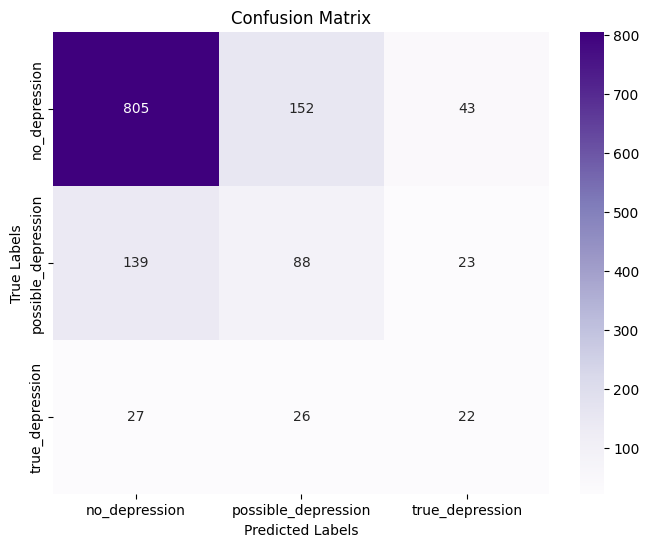

In [ ]:
#generate confusion matrix for best parameters

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels = ['no_depression', 'possible_depression', 'true_depression'], yticklabels = ['no_depression', 'possible_depression', 'true_depression'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
doc = docx.Document()

doc.add_heading('Hiperparametrization', 0)

# Table data in a form of list
# data = (
#     (1, 'Geek 1'),
#     (2, 'Geek 2'),
#     (3, 'Geek 3')
# )

# Creating a table object
table = doc.add_table(rows=1, cols=6)
  # max_features: 1000 n_gram: (1, 1)  n_estimators: 10  max_depth: 1  learning_rate: 0.001  f1: 0.38419503322527343

# Adding heading in the 1st row of the table
row = table.rows[0].cells
row[0].text = 'max_features'
row[1].text = 'n_gram'
row[2].text = 'solver'
row[3].text = 'tol'
row[4].text = 'C'
row[5].text = 'f1'

# Adding data from the list to the table
for elem in data:
    # Adding a row and then adding data in it.
    row = table.add_row().cells
    # Converting id to string as table can only take string input
    row[0].text = str(elem['max_features'])
    row[1].text = str(elem['n_gram'])
    row[2].text = str(elem['solver'])
    row[3].text = str(elem['tol'])
    row[4].text = str(elem['C'])
    row[5].text = str(round(elem['f1'],4))

# Now save the document to a location
doc.save('hiperparam_lroversampling.docx')